# Ranging and Ransac

We'll use the following imports:

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

If you get an error from importing sklearn, then you will have to install it using:
conda install scikit-learn

For the exercise we will be using the data taken from a lidar by a robot in a hallway. The data is saved in "laser.csv" and we can import this in Python using numpy as such:

In [42]:
laser = np.genfromtxt('laser.csv', delimiter=',')


array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        6.36999989, 29.95999908, 29.95999908,  5.44999981,  5.38999987,
        5.4000001 ,  5.40999985,  5.42999983,  5.42999983,  4.44999981,
        4.21000004,  4.09000015,  3.96000004,  3.8499999 ,  3.73000002,
        3.61999989,  3.52999997,  3.3599999 ,  3.30999994,  3.28999996,
        3.18000007,  3.0999999 ,  3.03999996,  2.97000003,  2.9000001 ,
        2.8499999 ,  2.77999997,  2.73000002, 30.        , 30.        ,
       30.        , 30.        , 30.        ,  1.17916739,  1.19880605,
        1.1814369 ,  1.19648015,  1.21871912,  1.22393298,  1.24334586,
        1.23733234,  1.25529099,  1.26472497, 30.        , 30.        ,
       30.        ,  2.45000005,  2.46000004,  2.48000002,  2.48000002,
        2.49000001,  2.5       ,  2.50999999,  2.5       ,  2.51999998,
        2.5       ,  2.51999998,  2.47000003, 30.        ,  2.49

The file contains only a single rotation of the lidar. You can open the file in any text editor to get a look at the data. Each number in the file is the distance measured in meters. The lidar starts measuring at 135 degrees and ends at -135 degrees and it rotates the same amount between each measurement. 

## Exercise 3.1
Convert the data in the csv file to x and y coordinates in a Carthesian coordinate system and plot the result using matplotlib.

Hint: Use plt.scatter instead of plt.plot in order to show every measurement as a point. 

array([[-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ..., -0., -0., -0.]])

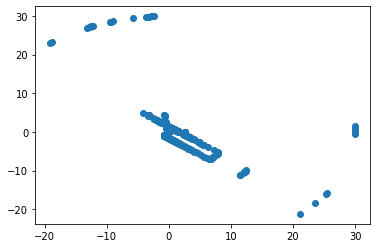

In [52]:
# Convert to x and y coordinates

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return [x, y]

x = np.zeros_like(laser)
y = np.zeros_like(laser)



deg = np.linspace(135,-135,len(laser))

for i in range(len(laser)):
    xy = pol2cart(laser[i],np.deg2rad(deg[i]))
    x[i] = xy[0]
    y[i] = xy[1]

cord = np.vstack((x,y))

plt.scatter(x,y)
cord

## Exercise 3.2

We would like to locate one of the walls in the dataset. To do so we will use Ransac to fine the best line fit in the noisy data. A Ransac regressor is initialized the following way using sklearn:

In [23]:
ransac = linear_model.RANSACRegressor()

Now that we have our Ransac regressor we can fit it to a dataset (x,y):

In [56]:
ransac.fit(np.array([x]),np.array([y]))

ValueError: `min_samples` may not be larger than number of samples: n_samples = 1.

Finally, to get the fitted line we can use the predict function. As an argument this takes the x values in which the line will be predicted:

In [6]:
# Predict line

Plot the line on top of the scatterplot from before to see the fit.

## Exercise 3.3

To see which data points were used to make the line fit and which were deemed outliers, we can use the function ransac.inlier_mask_

In [7]:
plt.scatter(x[ransac.inlier_mask_], y[ransac.inlier_mask_], color='green')

NameError: name 'x' is not defined

Find the second hallway wall using another Ransac fit and plot it together with the data points and the first ransac fit.

Hint: Use the outliers from the first Ransac.

In [ ]:
ransac2 = linear_model.RANSACRegressor()

# Find the second hallway wall